# 1. Entendiendo la Data

- Importación necesaria de librerías para este proyecto

In [1]:
from scipy import stats as st 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import nltk 

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [6]:
original_length = len(games)
original_length

16715

In [7]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
games.isna().sum()/ len(games) * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [9]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [10]:
games['Platform'].nunique()

31

In [11]:
def platform_company(x):
    if x in ('Wii', 'NES','GB','DS', 'SNES','GBA','3DS','N64','WiiU','GC'): 
        return 'Nintendo'
    elif x in ('X360','XB','XOne'):
        return 'Microsoft'
    elif x in ('PS3','PS2','PS4','PS','PSP','PSV'):
        return 'Sony'
    elif x in ('GEN','DC','SAT','SCD','GG'):
        return 'Sega'
    elif x in ('PC'):
        return 'Unknown-PC'
    elif x in ('2600'):
        return 'Atari'
    elif x in ('WS'):
        return 'Bandai'
    elif x in ('NG'):
        return 'SNK'
    elif x in ('TG16', 'PCFX'):
        return 'NEC'
    elif x in '3DO':
        return '3DO'
    else:
        return 'Others'

In [12]:
games['platform_company'] = games['Platform'].apply(platform_company)

In [13]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,platform_company
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN,Sega
6733,X-Men Origins: Wolverine,Wii,2009.0,Action,0.19,0.04,0.00,0.02,53.0,6.1,T,Nintendo
12939,Shaman King: Soul Fight,GC,2003.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN,Nintendo
1478,Skylanders SWAP Force,X360,2013.0,Platform,0.86,0.34,0.00,0.12,83.0,5.7,E10+,Microsoft
835,Need for Speed: ProStreet,PS3,2007.0,Racing,0.73,0.91,0.04,0.36,73.0,6,E10+,Sony
5187,The Incredibles: Rise of the Underminer,PS2,2005.0,Action,0.18,0.14,0.00,0.05,60.0,7.1,E10+,Sony
5653,From TV Animation One Piece: Grand Battle! 3,PS2,2003.0,Fighting,0.00,0.00,0.32,0.00,NaN,NaN,NaN,Sony
3749,Valkyria Chronicles II,PSP,2010.0,Role-Playing,0.12,0.15,0.18,0.09,83.0,8.1,T,Sony
7329,Momotarou Dentetsu 16,PS2,2006.0,Misc,0.00,0.00,0.21,0.00,NaN,NaN,NaN,Sony
1232,NASCAR 98,PS,1996.0,Racing,1.43,0.05,0.00,0.04,NaN,NaN,NaN,Sony


In [14]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [15]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [16]:
games['Rating'].nunique()

8

In [17]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
0.6       2
1.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [18]:
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [19]:
games['Name'].nunique()

11559

In [20]:
games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [21]:
games['Year_of_Release'].nunique()

37

In [22]:
games['Year_of_Release'].min()

1980.0

In [23]:
games['Year_of_Release'].max()

2016.0

In [24]:
games.duplicated().sum()

0

- La tabla de datos del juego tiene muchos valores faltantes. En particular, Critic_Score, User_Score y Rating tienen más de la mitad de sus valores faltantes. Year_of_Release y Name tienen menos valores faltantes, pero aún hay algunos.

- PS2 es la plataforma más popular, con 2161 lanzamientos, el género de accion es el más popular, y el rating E es la calificación más popular.

- Los géneros se pueden cambiar a minúsculas y las plataformas se pueden agrupar por compañía de consolas. Las calificaciones se pueden dejar como están, pero se pueden agregar más detalles, como el organismo de calificación que las otorgó.

- Los nombres de las columnas se pueden cambiar a minúsculas para que sean más fáciles de leer.

# 2. Preprocesamiento de Data

In [25]:
games.columns = games.columns.str.lower()

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16446 non-null  float64
 3   genre             16713 non-null  object 
 4   na_sales          16715 non-null  float64
 5   eu_sales          16715 non-null  float64
 6   jp_sales          16715 non-null  float64
 7   other_sales       16715 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        10014 non-null  object 
 10  rating            9949 non-null   object 
 11  platform_company  16715 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


- Todas las columnas están en minúscula ahora

In [27]:
games['platform'] = games['platform'].str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo


- Sólo tenemos que minúsculas los valores

- Solo faltan 2 valores que se dejaron en blanco, y los valores se convertirán a minúscula

In [28]:
games['name'] = games['name'].str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo


In [29]:
games['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

- Hay juegos en la lista que tienen el nombre de la plataforma en el nombre. Queremos que todos los juegos tengan el mismo nombre en todas las plataformas, así que vamos a escribir una función para eliminar el nombre de la plataforma del nombre del juego, si está presente. Esto es necesario porque queremos que todos los juegos tengan el mismo nombre en todas las plataformas. Usaremos bloques try-except para evitar que la función falle si encuentra un valor faltante.

In [30]:
def no_p_name(row): 
    try: 
        name=row['name']   
        if row['platform'] in row['name']:     
            name = row['name'].strip(row['platform'])    
            return name
        return name
    except:
        name=row['name']
        return name
    
games['name'] = games.apply(no_p_name, axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company
0,sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,mario kart,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
3,sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo


In [31]:
games.dtypes

name                 object
platform             object
year_of_release     float64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score           object
rating               object
platform_company     object
dtype: object

- int32 o int64 pueden hacer cambio de tipo de datos incluso con los nulos

In [32]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

- Al igual que la columna "name", la columna "genre" tiene un par de valores faltantes que quedarán en blanco, pero de igual manera cambiaré los valores a minúsculas.

In [33]:
games['genre'] = games['genre'].str.lower()
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,Nintendo
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Nintendo
7,play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Nintendo
8,new super mario bros.,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Nintendo
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,Nintendo


In [34]:
games['genre'] = games['genre'].fillna('indefinido')
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,Nintendo
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,Nintendo
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,Nintendo
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Nintendo
7,play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Nintendo
8,new super mario bros.,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Nintendo
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,Nintendo


In [35]:
games['user_score'] = np.where(games['user_score'] == 'tbd', np.nan, games['user_score'])

In [36]:
games['user_score'] = games['user_score'].astype(float)

In [37]:
games['critic_score'] = games['critic_score'].astype('Int64')

In [38]:
games.dtypes

name                 object
platform             object
year_of_release       Int64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score          Int64
user_score          float64
rating               object
platform_company     object
dtype: object

In [39]:
original_length

16715

In [40]:
games = games.dropna(subset=['name']) 
len(games)

16713

In [41]:
games['year_of_release'].isna().sum()/original_length*100

1.609332934489979

In [42]:
games = games.dropna(subset=['year_of_release']) 
len(games)

16444

In [43]:
(1-(len(games)/original_length))*100

1.6212982351181626

In [44]:
(len(games)/original_length)*100

98.37870176488184

- El total de datos a eliminar de year_of_release y name es solo el 1.62%, por lo que seguimos teniendo un 98.37% de datos con los que podemos trabajar.

-  User_Score, Critic_Score y el Rating, tienen muchos valores perdidos, así que no los eliminaré porque se perdería mucha información. Se necesita más información e investigar por qué faltan tantos valores.

In [45]:
games.loc[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,Nintendo
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,Nintendo
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,Nintendo
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,Nintendo
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,Sony
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,Microsoft
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,Sony
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,Nintendo


In [46]:
games.loc[games['critic_score'].isna()]['genre'].value_counts()/original_length *100

action          8.710739
misc            7.250972
sports          6.826204
adventure       5.821119
role-playing    4.486988
simulation      3.045169
racing          2.997308
fighting        2.584505
platform        2.321268
strategy        2.255459
shooter         2.231529
puzzle          2.087945
Name: genre, dtype: float64

In [47]:
games.loc[games['critic_score'].isna()]['platform'].value_counts()/original_length *100

ds      8.453485
ps      5.946754
ps2     5.097218
psp     4.409213
wii     4.295543
ps3     3.003290
gba     2.279390
3ds     2.069997
x360    2.022136
n64     1.890517
psv     1.854622
pc      1.543524
snes    1.429853
sat     1.034999
ps4     0.837571
2600    0.693987
gc      0.628178
nes     0.586300
gb      0.580317
xb      0.580317
xone    0.466647
wiiu    0.341011
dc      0.227341
gen     0.161532
ng      0.071792
ws      0.035896
scd     0.035896
3do     0.017948
tg16    0.011965
gg      0.005983
pcfx    0.005983
Name: platform, dtype: float64

In [48]:
games.loc[games['critic_score'].isna()]['year_of_release'].value_counts()/original_length *100

2009    4.636554
2010    4.516901
2008    4.259647
2011    3.804966
2007    3.021238
2006    2.309303
2015     2.27939
1998     2.09991
2012     1.98624
2014    1.914448
1999    1.788812
2005    1.699073
1997    1.627281
2013    1.621298
2016    1.615316
1996    1.525576
1995      1.3102
2000    1.238409
2002    1.208495
2004    1.202513
2003    1.136704
2001    0.933293
1994    0.717918
1993    0.358959
1981    0.275202
1992    0.251271
1991    0.245289
1982    0.215375
1986    0.125636
1989    0.101705
1983    0.101705
1990    0.095722
1987    0.095722
1984    0.083757
1988    0.083757
1985    0.077774
1980    0.053844
Name: year_of_release, dtype: Float64

In [49]:
games.loc[games['rating'].isna()]['year_of_release'].value_counts().sort_values()

1980      9
1985     13
1984     14
1988     14
1987     16
1990     16
1989     17
1983     17
1986     21
1982     36
1992     41
1991     41
1981     46
1993     60
1994    120
2001    143
2003    162
2004    164
2002    174
2000    202
1995    219
2016    222
2013    228
2005    233
2014    236
1996    256
1997    270
2015    291
1999    296
2012    298
2006    328
1998    347
2007    376
2009    415
2011    433
2008    446
2010    456
Name: year_of_release, dtype: Int64

In [50]:
games.loc[games['rating'].isna()]['platform'].value_counts()

ps      986
ds      866
ps2     671
psp     657
ps3     371
n64     316
wii     309
gba     297
3ds     289
psv     279
snes    239
x360    202
pc      200
sat     173
ps4     137
2600    116
nes      98
gb       97
xb       89
gc       85
xone     61
wiiu     42
dc       38
gen      27
ng       12
ws        6
scd       6
3do       3
tg16      2
gg        1
pcfx      1
Name: platform, dtype: int64

- No veo una razón clara por la que haya tantos datos faltantes. Tal vez para la calificación, porque ESRB es un sistema de calificación de Estados Unidos, los datos faltantes sean para productos de juegos que no son de Estados Unidos.

In [51]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [52]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company,total_sales
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,Nintendo,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,Nintendo,40.24
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,Nintendo,35.52
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,Nintendo,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,Nintendo,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,Nintendo,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E,Nintendo,29.80
7,play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,Nintendo,28.91
8,new super mario bros.,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,E,Nintendo,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,Nintendo,28.31


In [53]:
games['platform_company'].value_counts()

Sony          6637
Nintendo      6169
Microsoft     2282
Unknown-PC     957
Sega           259
Atari          116
SNK             12
Bandai           6
NEC              3
3DO              3
Name: platform_company, dtype: int64

# 3. Análisis de Datos Exploratorio

- Lanzamiento de videojuegos a través de los años

In [54]:
year_count=games.groupby('year_of_release')['name'].count()
year_count

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

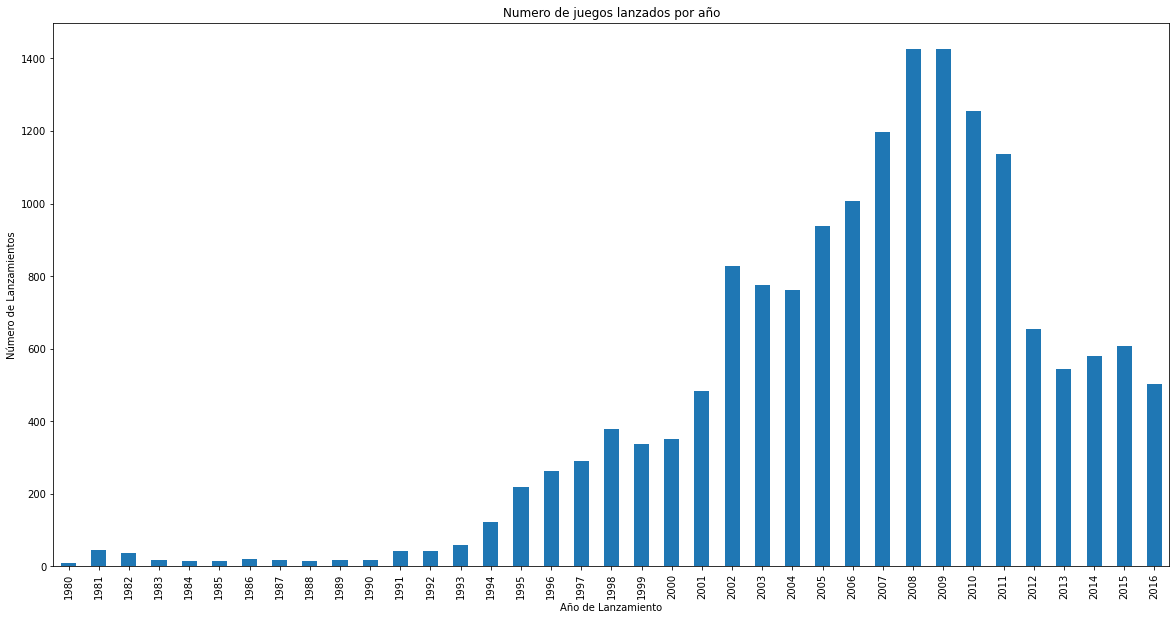

In [55]:
year_count.plot.bar(rot=90, figsize=(20, 10))
plt.title('Numero de juegos lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Lanzamientos')
plt.show()

- Observo que se lanzaron menos de 200 videojuegos por año hasta 1995, pero a partir de entonces los lanzamientos empezaron a aumentar. Los años 2007 a 2011 fueron los que más lanzamientos tuvieron, con 1476 lanzamientos en 2009. No todos los periodos fueron iguales.

In [56]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

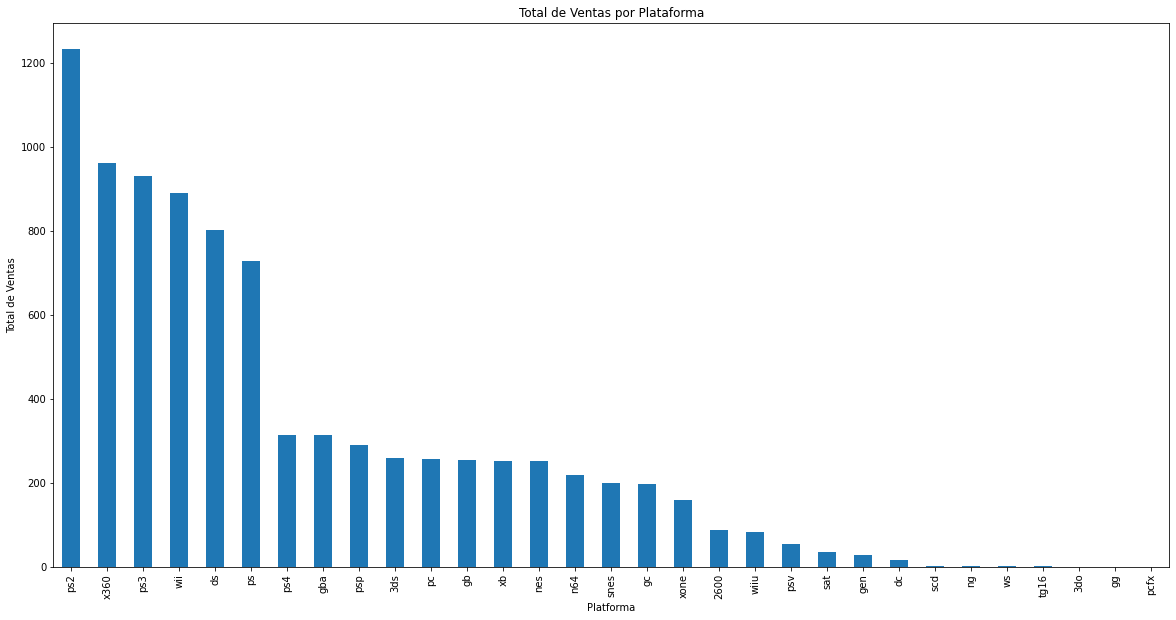

In [57]:
plt.figure(figsize=(20,10))
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total de Ventas por Plataforma')
plt.xlabel('Platforma')
plt.ylabel('Total de Ventas')
plt.show()

In [58]:
top10_plataformas = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).reset_index()['platform'].to_list()
top10_plataformas

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds']

- El top 10 de plataformas lanzadas por orden son PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, PC.

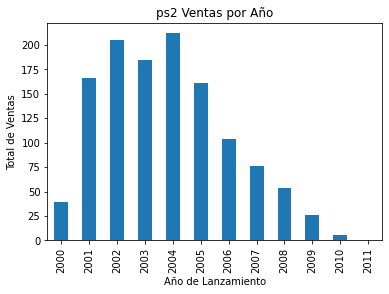

In [59]:
plt.title(top10_plataformas[0] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[0]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- Actividad de 11 años para el PS2

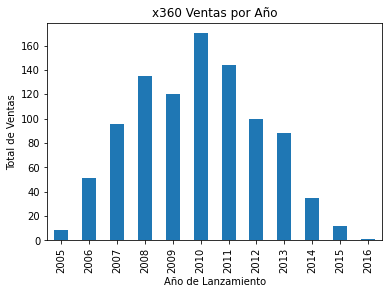

In [60]:
plt.title(top10_plataformas[1] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[1]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- Actividad de 11 años del Xbox 360 también

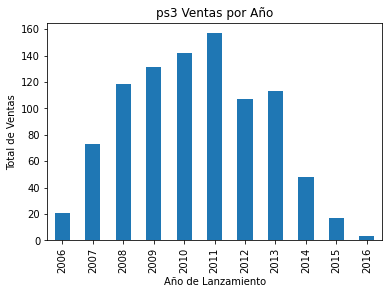

In [61]:
plt.title(top10_plataformas[2] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[2]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- La actividad del PS3 fue un año menos aparentemente

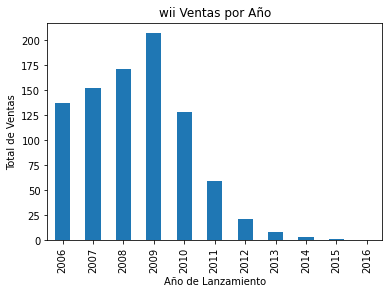

In [62]:
plt.title(top10_plataformas[3] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[3]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- 10 años de igual manera con la consola Wii

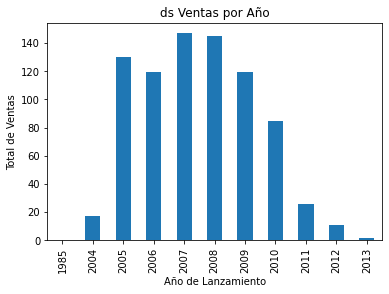

In [63]:
plt.title(top10_plataformas[4] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[4]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- El Nintendo DS tuvo actividad por 9 años

In [64]:
games.loc[((games['platform']=='DS') & (games['year_of_release']==1985))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company,total_sales


- El Nintendo DS fué lanzado en 2004, por lo que ese dato que aparecía de venta en 1985 era incorrecto, por lo que será removido

In [65]:
games = games.drop([15957])

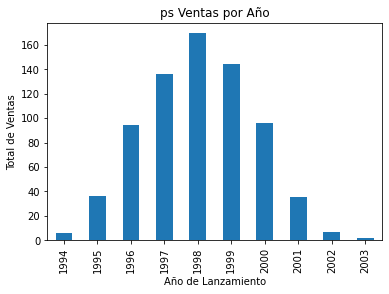

In [66]:
plt.title(top10_plataformas[5] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[5]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- El PS1 estuvo activo por 9 años

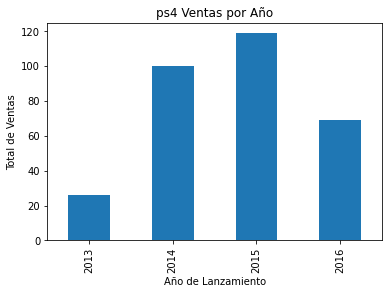

In [67]:
plt.title(top10_plataformas[6] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[6]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- El PS4 hasta la fecha sigue activo en el año 2023, pero hasta la fecha de estos datos solo habían pasado 3 años

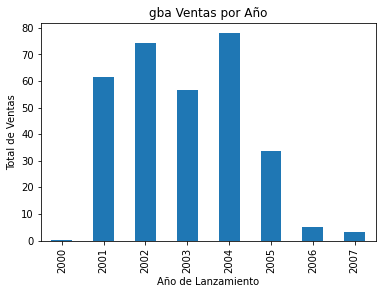

In [68]:
plt.title(top10_plataformas[7] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[7]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- El Gameboy Advanced estuvo activo por 7 años

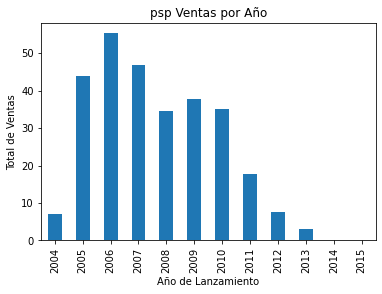

In [69]:
plt.title(top10_plataformas[8] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[8]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- El Playstation Portátil estuvo activo por 11 años

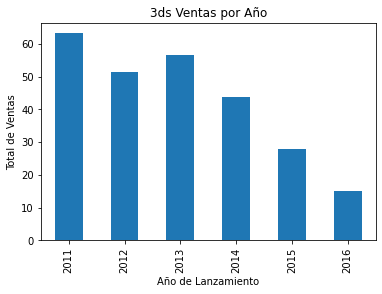

In [70]:
plt.title(top10_plataformas[9] + ' Ventas por Año')
games.loc[games['platform']==top10_plataformas[9]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Total de Ventas")
plt.show()

- El Nintendo 3DS estuvo activo por 5 años

In [71]:
top10 = games.loc[games['platform'].isin(top10_plataformas)].groupby(['platform'])['year_of_release'].agg({min, max}).reset_index()
top10['active_years'] = top10['max']-top10['min']
top10.sort_values(by='active_years', ascending=False)

,platform,max,min,active_years
4,ps2,2011,2000,11
7,psp,2015,2004,11
9,x360,2016,2005,11
5,ps3,2016,2006,10
8,wii,2016,2006,10
1,ds,2013,2004,9
3,ps,2003,1994,9
2,gba,2007,2000,7
0,3ds,2016,2011,5
6,ps4,2016,2013,3


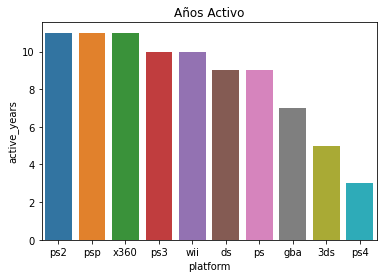

In [72]:
sns.barplot(x='platform',y='active_years',data=top10.sort_values(by='active_years', ascending=False))
plt.title('Años Activo')
plt.show()

In [73]:
top10['active_years'].median()

9.5

In [74]:
top10['active_years'].mean()

8.6

- Las nuevas plataformas tardan unos 9 a 10 años en tener actividad.
- La siguiente plataforma de consola de Playstation tarda entre 5 y 6 años en aparecer. En este ejemplo, la PS1 apareció en 1994, la PS2 en 2000 y la ps3 en 2006.
- PS2, PSP, y el XBOX 360 son el ciclo de vida más activo (11 años activos antes de desaparecer)

# Pasos para seleccionar los datos:

- Considerar las respuestas a las preguntas anteriores. ¿Qué queremos predecir? ¿Qué factores influyen en ese pronóstico?
- Seleccionar los datos que sean relevantes para esas preguntas. ¿Cuáles son los datos que nos ayudarán a entender la relación entre los factores y el pronóstico?
- Limitar los datos al periodo de tiempo que queremos predecir. En este caso, el periodo de tiempo es 2017.

In [75]:
relev_data = games.query('year_of_release >= 2014')
relev_platform_rank = relev_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
relev_platform_rank

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: total_sales, dtype: float64

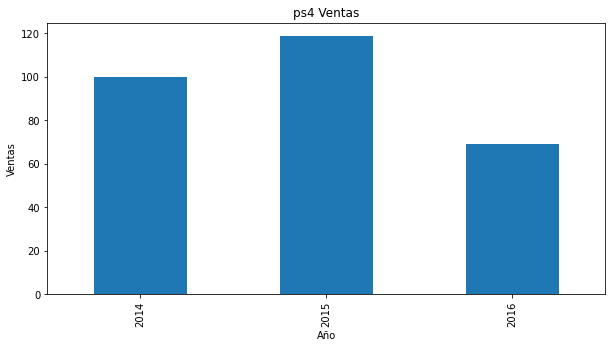

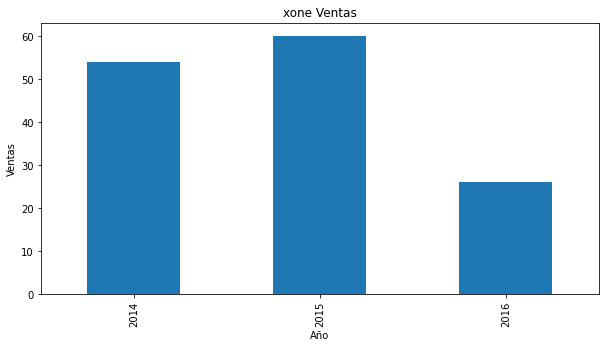

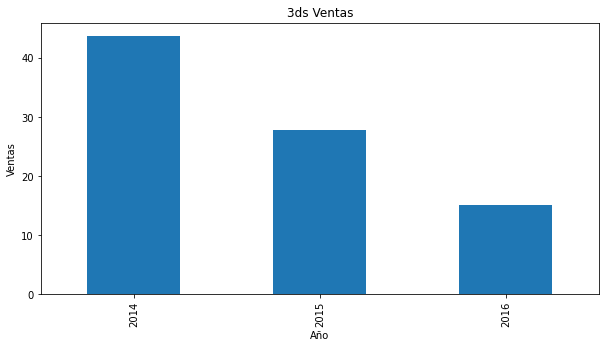

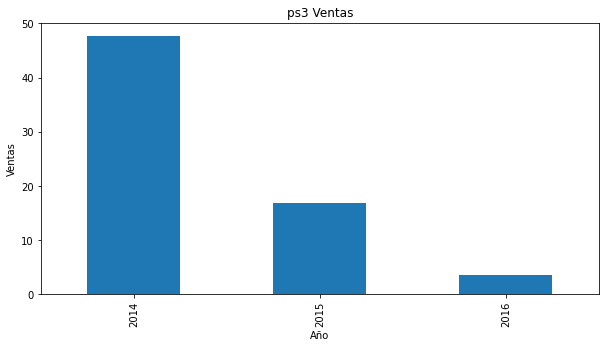

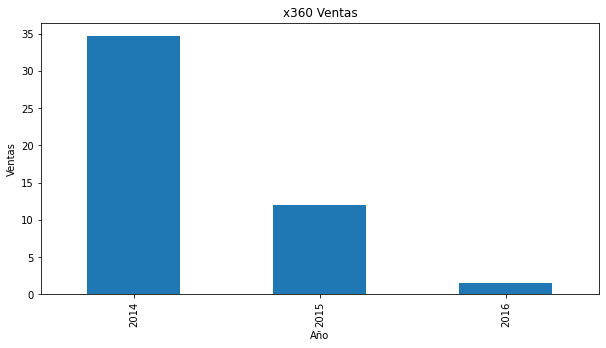

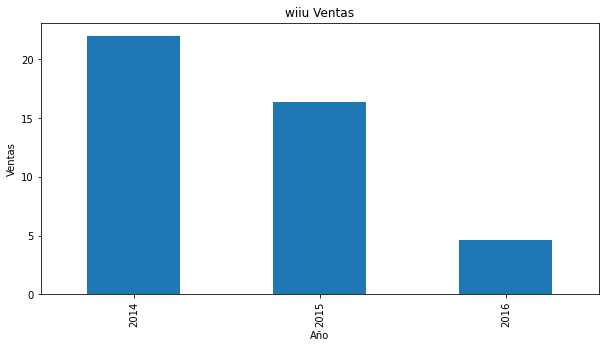

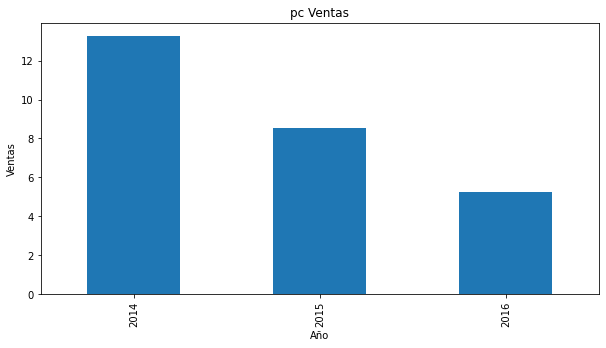

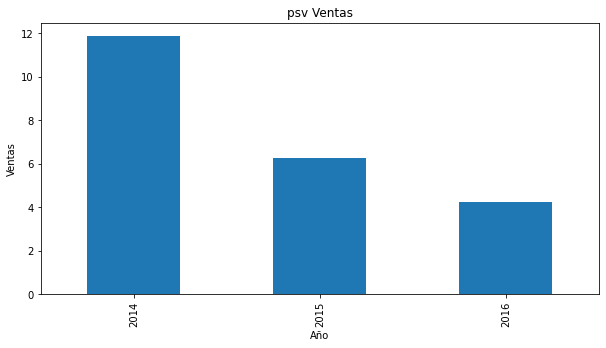

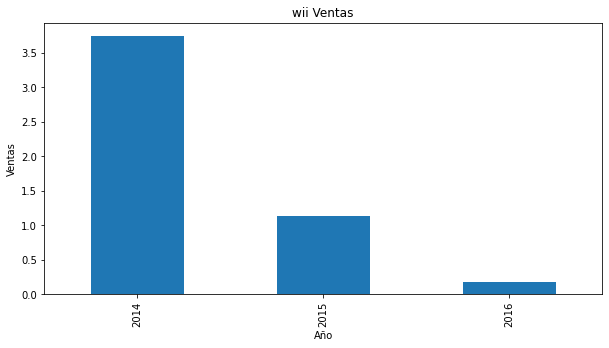

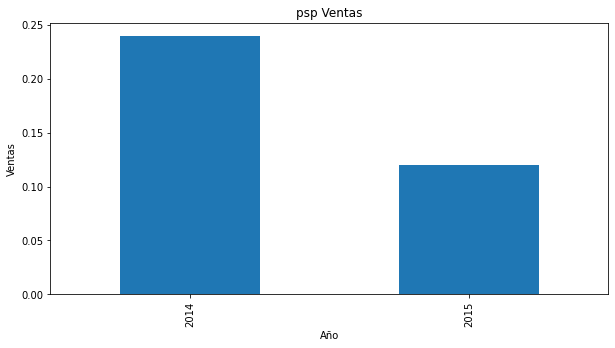

In [76]:
for platform in relev_platform_rank.index:
    p_slice=relev_data.query('platform == @platform')
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(10, 5))

    plt.title('{} Ventas'.format(platform))
    plt.xlabel('Año')
    plt.ylabel('Ventas')
    plt.show()
    print('')

- Las consolas antiguas están perdiendo popularidad, mientras que las nuevas están ganando terreno.
- Las ventas de las consolas nuevas no fueron tan buenas en 2016, pero todavía estaban en sus primeras etapas, por lo que se esperaba que ganen más dinero en los próximos años.
- Las otras consolas ya estaban muertas antes de 2016.

- Las consolas que tienen más probabilidades de ganar dinero en 2017 son las que tuvieron un buen año en 2016, como XBOX ONE, PS4, 3DS, Wii U y PS vita. Así que voy a crear un subconjunto de nuestros datos relevantes que contenga solo filas donde la plataforma sea PS4 o XBOX One. Luego, crearé un boxplot para mostrar las ventas por cada plataforma.

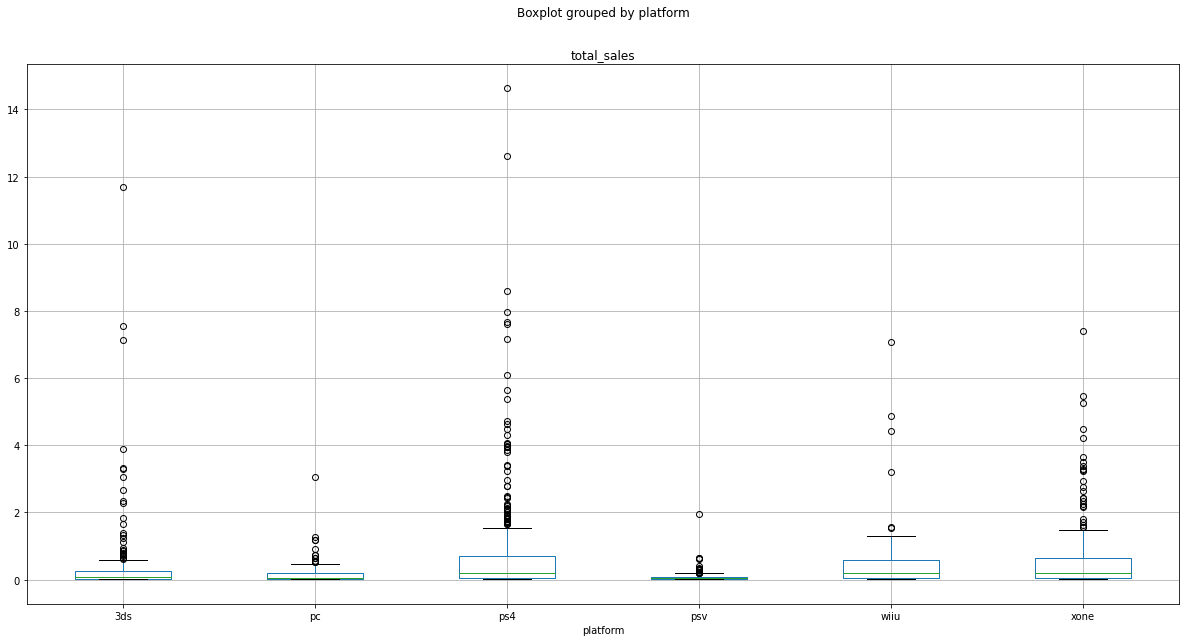

In [77]:
pprof_platforms=relev_data.query('platform == "ps4" | platform == "xone" | platform == "3ds" | platform == "wiiu" | platform == "pc" | platform == "psv"')
pprof_platforms.boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.show()

- Géneros más rentables

In [78]:
genre_count=relev_data['genre'].value_counts().sort_values(ascending=False)
genre_count

action          619
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: genre, dtype: int64

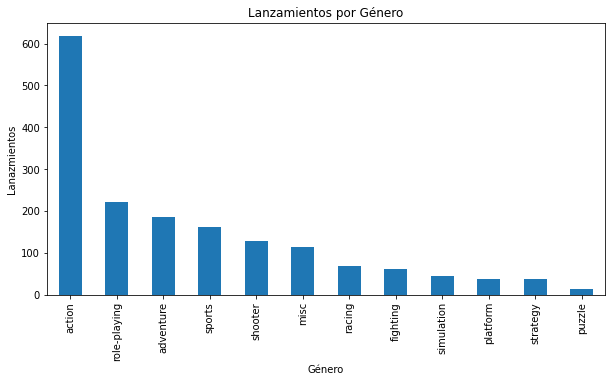

In [79]:
genre_count.plot.bar(rot=90, figsize=(10, 5))
plt.title('Lanzamientos por Género')
plt.xlabel('Género')
plt.ylabel('Lanazmientos')
plt.show()

- Los juegos de acción fueron los más populares, mientras que los juegos de plataformas fueron los menos populares. Ahora, vamos a ver cuáles son los géneros que más dinero han generado.

In [80]:
genre_profit=relev_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_profit

genre
action          199.36
shooter         170.94
sports          109.48
role-playing    101.44
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.55
simulation       13.13
strategy          3.96
puzzle            2.21
Name: total_sales, dtype: float64

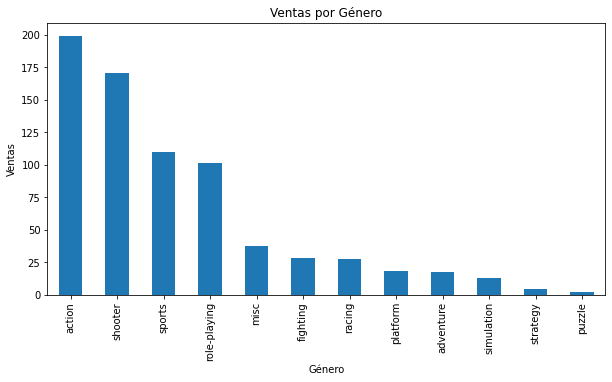

In [81]:
genre_profit.plot.bar(rot=90, figsize=(10, 5))
plt.title('Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.show()

- Los juegos de acción, shooters y deportes son los que más dinero hacen, mientras que los juegos de aventuras, rompecabezas y estrategia son los que menos dinero hacen. Al parecer, los géneros que más se venden suelen tener gráficos muy buenos, mientras que los que menos se venden no necesitan mucho trabajo gráfico por parte de los diseñadores.

In [82]:
games.loc[games['platform']==top10_plataformas[0]].groupby(['year_of_release'])['total_sales'].sum()

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

- PS2 fue la consola más vendida, pero dejó de venderse en 2011. XBOX 360 fue un éxito, pero sus ventas se desplomaron y en 2016 casi no se vendía. Basado en esto, voy a usar datos de 2014 para la nuevas generaciones de consola.

In [83]:
original_df = games.copy()
games['year_of_release'] = pd.to_numeric(games['year_of_release'])
games = games.loc[games['year_of_release']>= 2014]

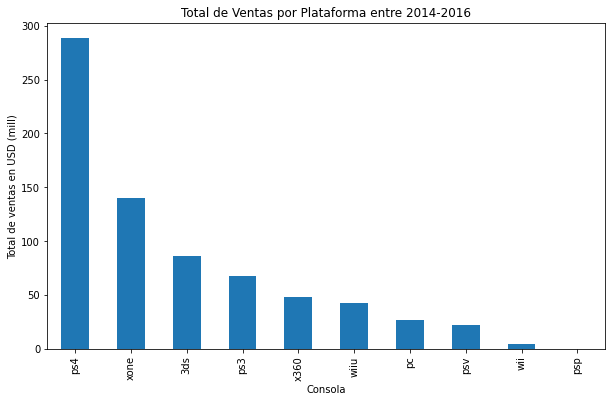

In [84]:
plt.figure(figsize=(10,6))
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total de Ventas por Plataforma entre 2014-2016')
plt.xlabel("Consola")
plt.ylabel("Total de ventas en USD (mill)")
plt.show()

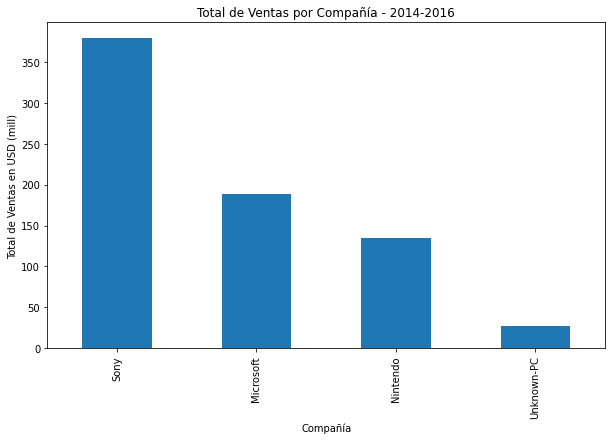

In [85]:
plt.figure(figsize=(10,6))
games.groupby('platform_company')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total de Ventas por Compañía - 2014-2016')
plt.xlabel("Compañía")
plt.ylabel("Total de Ventas en USD (mill)")
plt.show()

- La PS4 lidera en ventas, seguida de la Xbox One de Microsoft y la Nintendo 3DS en tercer lugar de ventas

In [86]:
top10_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).reset_index()['platform'].to_list()
top10_platforms

['ps4', 'xone', '3ds', 'ps3', 'x360', 'wiiu', 'pc', 'psv', 'wii', 'psp']

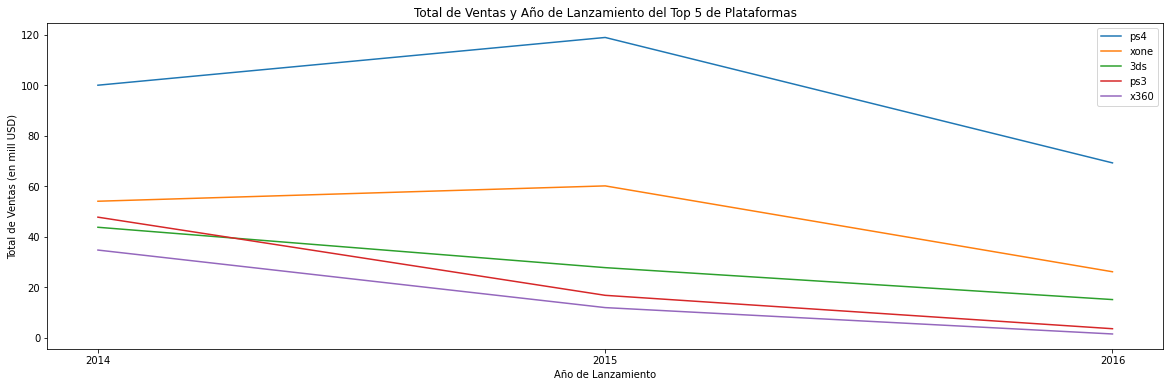

In [87]:
games['year_of_release'] = games['year_of_release'].astype(str)
plt.figure(figsize=(20,6))
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de Ventas (en mill USD)')
plt.title('Total de Ventas y Año de Lanzamiento del Top 5 de Plataformas')
for i in top10_platforms[0:5]:   
    sns.lineplot(data=games.loc[games['platform']==i].groupby(['year_of_release'])['total_sales'].sum(), label=i)
    plt.legend()
plt.show()

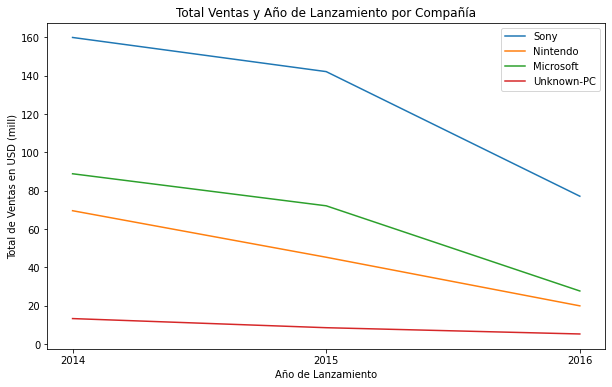

In [88]:
plt.figure(figsize=(10,6))
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de Ventas en USD (mill)')
plt.title('Total Ventas y Año de Lanzamiento por Compañía')
for i in games['platform_company'].unique().tolist():
    sns.lineplot(data=games.loc[games['platform_company']==i].groupby(['year_of_release'])['total_sales'].sum(), label=i)
    plt.legend()
plt.show()

- La PS4 de Sony es la consola más popular, pero sus ventas están empezando a bajar.
- La Xbox One de Microsoft es la segunda consola más popular, pero también está empezando a estabilizarse.
- El Nintendo 3DS de Nintendo es la tercera consola más popular, pero su ciclo de vida es más corto que el de sus competidores

-- -- Boxplot para las ventas globales de todos los juegos, desglosadas por plataformas.

In [89]:
top5 = top10_platforms[0:5]
games_top5 = games[games['platform'].isin(top5)]
games_top5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,Sony,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,Sony,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,Nintendo,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,Sony,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,Sony,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16672,metal gear solid v: the definitive experience,xone,2016,action,0.01,0.00,0.00,0.00,<NA>,NaN,M,Microsoft,0.01
16674,tsukigime ranko's longest day,ps3,2014,action,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,Sony,0.01
16677,aikatsu stars! my special appeal,3ds,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,Nintendo,0.01
16691,dynasty warriors: eiketsuden,ps3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,Sony,0.01


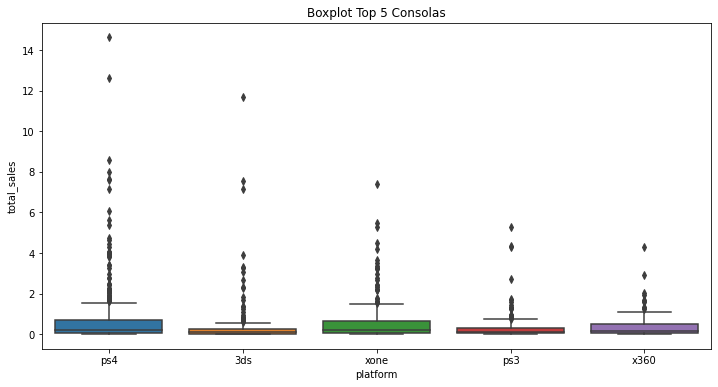

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot(data=games_top5, x='platform',y='total_sales')
plt.title('Boxplot Top 5 Consolas')
plt.show()

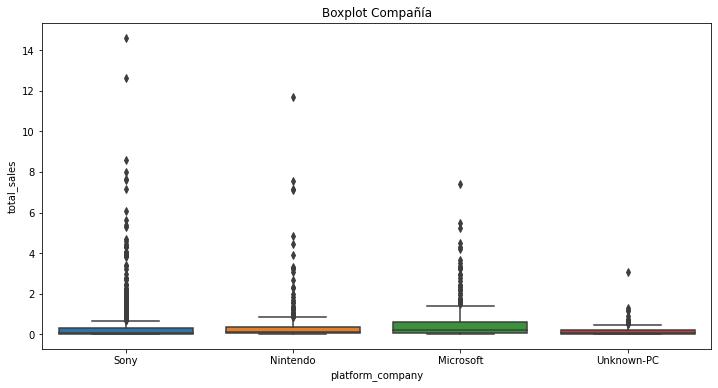

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(data=games, x='platform_company',y='total_sales')
plt.title('Boxplot Compañía')
plt.show()

- Es muy dificil de leer, aunque a cierta vista Micorosft parece tener un mayor número de ventas, pero lo comprabaremos remvoiendo los outliers para tener una mejor visión

In [92]:
Q1 = games['total_sales'].quantile(0.25)
Q3 = games['total_sales'].quantile(0.75)
IQR = Q3 - Q1
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

Q1:  0.03
Q3:  0.35000000000000003
IQR:  0.32000000000000006
min:  0
max:  0.8300000000000001


In [93]:
games_no_outliers = games[(games['total_sales'] >= bottom_cutoff) & (games['total_sales'] <= top_cutoff)]

In [94]:
games_top5_no_outliers = games[(games['platform'].isin(top5)) & (games['total_sales'] >= bottom_cutoff) & (games['total_sales'] <= top_cutoff)]

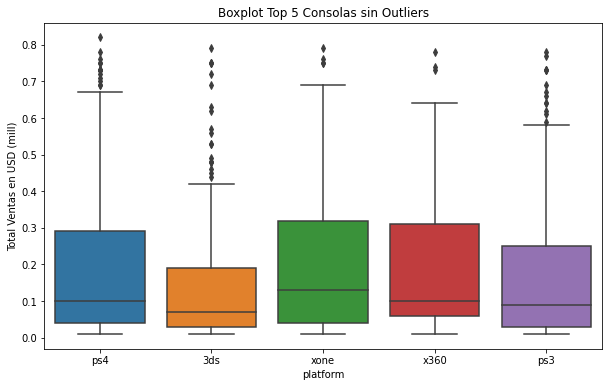

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(data=games_top5_no_outliers, x='platform',y='total_sales')
plt.ylabel("Total Ventas en USD (mill)")
plt.title('Boxplot Top 5 Consolas sin Outliers')
plt.show()

- Confirmo de que el Xbox One es la consola más vendida, seguido por el PS4 y el Xbox 360.

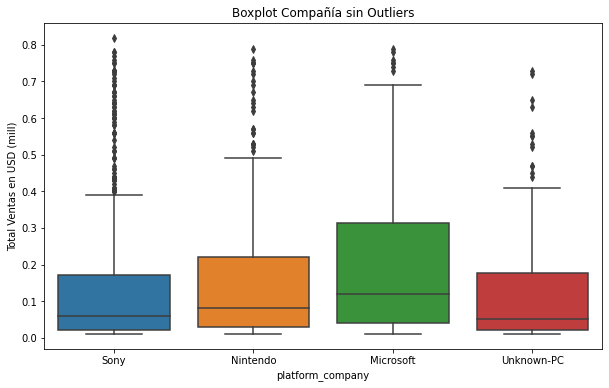

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(data=games_no_outliers, x='platform_company',y='total_sales')
plt.ylabel("Total Ventas en USD (mill)")
plt.title('Boxplot Compañía sin Outliers')
plt.show()

- Nuevamente se confirma que Microsoft lidera las ventas, y en segundo lugar viene Nintendo que a pesar de que su consola más popular no está en el top 3 de ventas, como compañía aparece en segundo lugar, probablemente por ventas de sus otras consolas.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


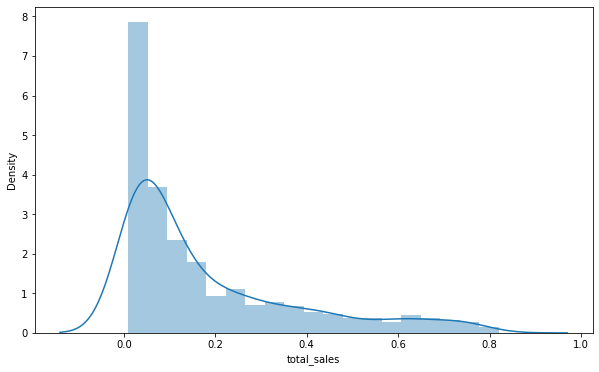

In [97]:
plt.figure(figsize=(10,6))
sns.distplot(games_top5_no_outliers['total_sales'])
plt.show()

- La media es mayor que la mediana, por eso la distribución se carga a la derecha de manera positiva

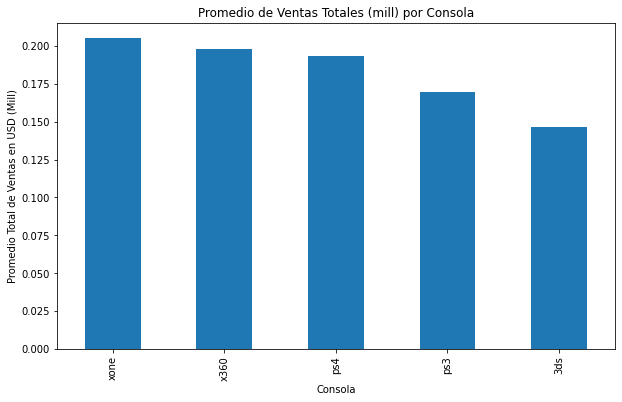

In [98]:
plt.figure(figsize=(10,6))
games_top5_no_outliers.groupby(['platform'])['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Promedio de Ventas Totales (mill) por Consola')
plt.xlabel("Consola")
plt.ylabel("Promedio Total de Ventas en USD (Mill)")
plt.show()

- Xbox One lidera la tabla, seguido del Xbox 360 y el PS4

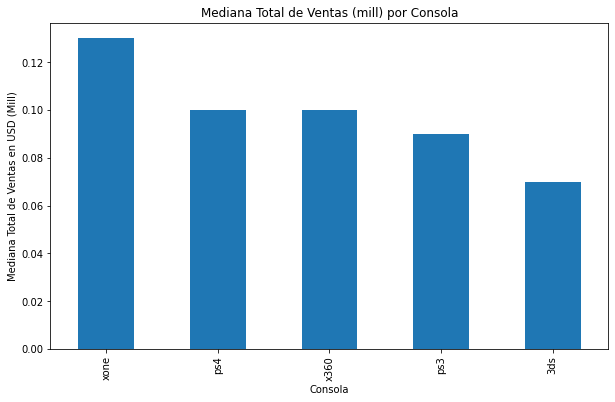

In [99]:
plt.figure(figsize=(10,6))
games_top5_no_outliers.groupby(['platform'])['total_sales'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Mediana Total de Ventas (mill) por Consola')
plt.xlabel("Consola")
plt.ylabel("Mediana Total de Ventas en USD (Mill)")
plt.show()

- Xbox One de igual manera lidera en la mediana de ventas totales, seguido del PS4 y el Xbox 360

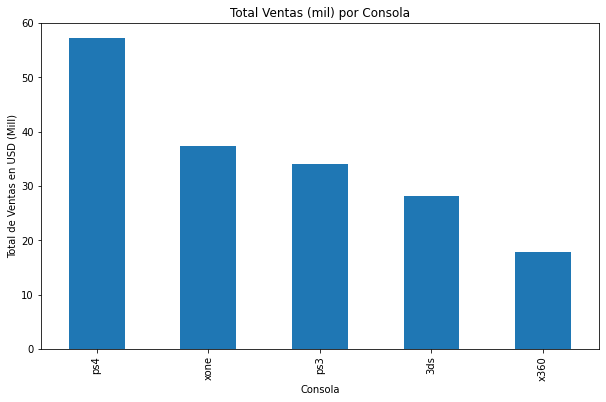

In [100]:
plt.figure(figsize=(10,6))
games_top5_no_outliers.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Ventas (mil) por Consola')
plt.xlabel("Consola")
plt.ylabel("Total de Ventas en USD (Mill)")
plt.show()

- PS4 tiene el mayor monto de ventas, seguido del Xbox One, y luego el PS3

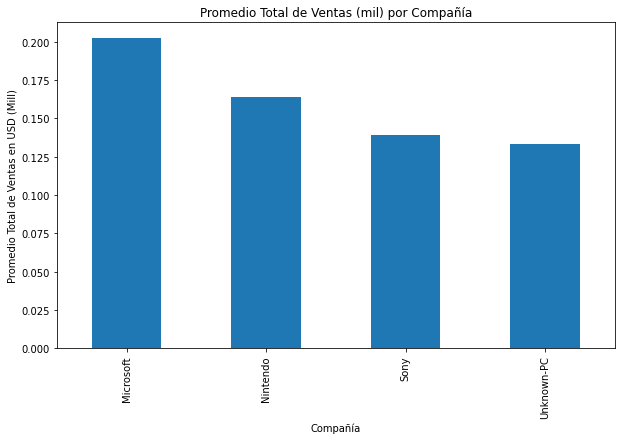

In [101]:
plt.figure(figsize=(10,6))
games_no_outliers.groupby(['platform_company'])['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Promedio Total de Ventas (mil) por Compañía')
plt.xlabel("Compañía")
plt.ylabel("Promedio Total de Ventas en USD (Mill)")
plt.show()

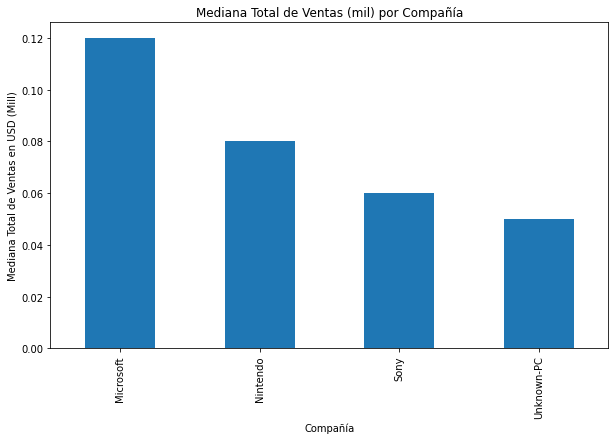

In [102]:
plt.figure(figsize=(10,6))
games_no_outliers.groupby(['platform_company'])['total_sales'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Mediana Total de Ventas (mil) por Compañía')
plt.xlabel("Compañía")
plt.ylabel("Mediana Total de Ventas en USD (Mill)")
plt.show()

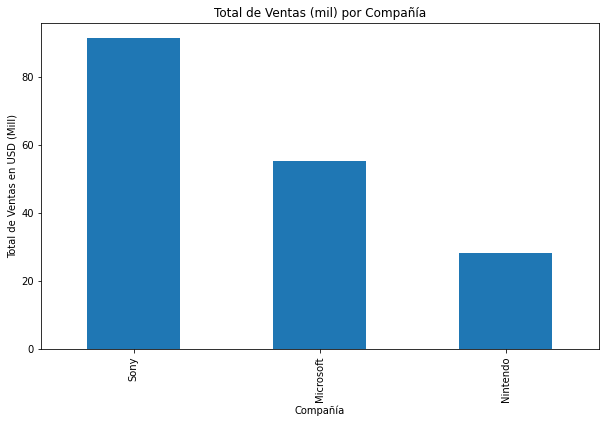

In [103]:
plt.figure(figsize=(10,6))
games_top5_no_outliers.groupby(['platform_company'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total de Ventas (mil) por Compañía')
plt.xlabel("Compañía")
plt.ylabel("Total de Ventas en USD (Mill)")
plt.show()

- La Xbox One es la consola que vende más juegos de media y en mediana.
- Microsoft es la empresa que vende más juegos de media y en mediana, seguida de Nintendo.
- La PS4 y Sony son las empresas que venden más juegos y ganan más dinero, seguidas de Microsoft con la Xbox One.

-- Cómo afectan las opiniones de usuarios y profesionales a las ventas de una consola popular? (Que yo seleccione)
- Construiré un scatterplot y calcularé la correlación entre reseñas y ventas
- Elegiré el PS4 ya que es la que mayor ventas registra entre 2014 y 2016

In [104]:
ps4 = games[games['platform']=='ps4']
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_company,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,Sony,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,Sony,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,Sony,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,Sony,7.98
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,M,Sony,7.66


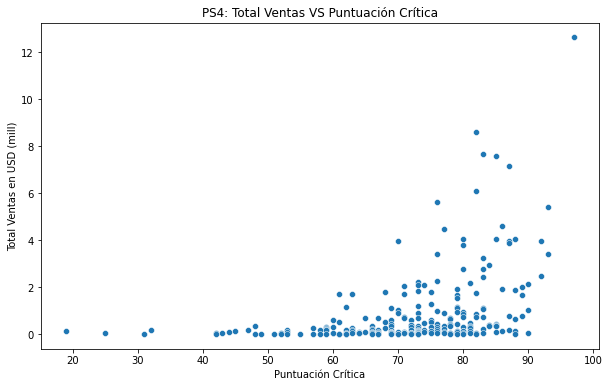

In [105]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4, x="critic_score", y="total_sales")
plt.title('PS4: Total Ventas VS Puntuación Crítica')
plt.xlabel("Puntuación Crítica")
plt.ylabel("Total Ventas en USD (mill)")
plt.show()

- Se ve una correlación positiva

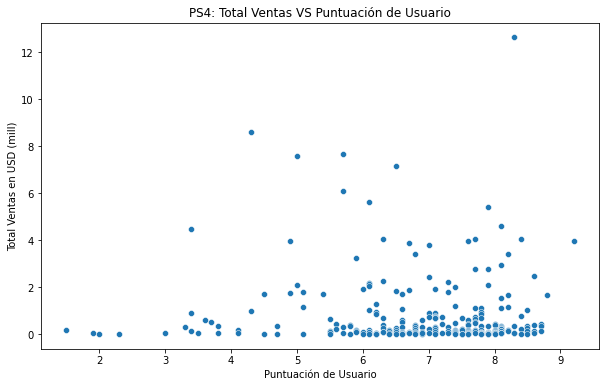

In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4, x="user_score", y="total_sales")
plt.title('PS4: Total Ventas VS Puntuación de Usuario')
plt.xlabel("Puntuación de Usuario")
plt.ylabel("Total Ventas en USD (mill)")
plt.show()

- No se alcanza a ver o confirmar una correlación

In [107]:
ps4['user_score'].corr(ps4['total_sales'])

-0.040131589472697356

In [108]:
ps4['critic_score'] = ps4['critic_score'].astype('float')

/tmp/ipykernel_44/2794930188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4['critic_score'] = ps4['critic_score'].astype('float')


In [109]:
ps4['critic_score'].corr(ps4['total_sales'])

0.40266141068104083

In [110]:
ps4.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.784902,0.491452,0.944903,0.411638,-0.016156,0.928090
eu_sales,0.784902,1.000000,0.472101,0.944380,0.340268,-0.064199,0.958109
jp_sales,0.491452,0.472101,1.000000,0.510433,0.379041,0.179384,0.538524
other_sales,0.944903,0.944380,0.510433,1.000000,0.404645,-0.044166,0.998252
critic_score,0.411638,0.340268,0.379041,0.404645,1.000000,0.546434,0.402661
user_score,-0.016156,-0.064199,0.179384,-0.044166,0.546434,1.000000,-0.040132
total_sales,0.928090,0.958109,0.538524,0.998252,0.402661,-0.040132,1.000000


- Confirmamos que no existe correlación entre la puntuación de usuario y el total de ventas, asi que los juegos con mayor puntuación de la crítica tienen mayores ventas totales.

-- Comparación de ventas de los mismos juegos en otras plataformas

In [111]:
multigames = games.groupby(['name'])['platform'].nunique().to_frame().reset_index()
multigames = multigames.loc[multigames['platform']>1]
multigames

,name,platform
6,2014 fifa world cup brazil,2
7,3rd super robot wars z jigoku hen,2
8,3rd super robot wars z: tengoku-hen,2
10,7 days to die,2
19,adventure time: finn & jake investigations,6
...,...,...
938,yakuza: ishin,2
946,yoru no nai kuni,3
953,zero escape: zero time dilemma,2
955,zombie army trilogy,2


In [112]:
len(multigames)/ len(games['name'].unique()) * 100

38.349007314524556

- 38.3% de los juegos se desarrollan para múltiples consolas desde el 2014

In [113]:
games.loc[games['name'].isin(multigames['name'])]['platform'].value_counts()

ps4     296
xone    210
ps3     186
x360    109
pc      104
psv     101
wiiu     43
3ds      35
wii      11
psp       4
Name: platform, dtype: int64

- Los juegos de PS4 son los más populares en multiples consolas.

- Los 10 mejores juegos desarrollados en múltiples plataformas ordenados por número de plataforma

In [114]:
games.groupby(['name'])['platform'].nunique().sort_values(ascending=False).head(10)

name
the lego movie videogame             8
lego the hobbit                      8
lego batman 3: beyond gotham         8
fifa 15                              8
lego jurassic world                  8
lego star wars: the force awakens    7
the amazing spider-man 2 (2014)      7
skylanders: trap team                7
lego marvel's avengers               7
skylanders: superchargers            7
Name: platform, dtype: int64

- Los 10 mejores juegos desarrollados en varias plataformas para distintas compañías

In [115]:
games.groupby(['name'])['platform_company'].nunique().sort_values(ascending=False).head(10)

name
watch dogs                         4
the lego movie videogame           4
lego batman 3: beyond gotham       4
lego jurassic world                4
lego the hobbit                    4
the amazing spider-man 2 (2014)    4
fifa 15                            4
transformers: devastation          3
castlevania: lords of shadow 2     3
homefront: the revolution          3
Name: platform_company, dtype: int64

- Total de ventas de juegos con múltiples plataformas

In [116]:
games_multi_sales = games.loc[games['name'].isin(multigames['name'])].groupby(['name','platform']).agg({'total_sales':'sum'})
games_multi_sales

total_sales
name                                platform             
2014 fifa world cup brazil          ps3              0.61
                                    x360             0.43
3rd super robot wars z jigoku hen   ps3              0.23
                                    psv              0.19
3rd super robot wars z: tengoku-hen ps3              0.15
...                                                   ...
zero escape: zero time dilemma      psv              0.06
zombie army trilogy                 ps4              0.20
                                    xone             0.11
zombiu                              ps4              0.06
                                    xone             0.01

[1099 rows x 1 columns]

- Ventas totales de juegos con múltiples consolas con ventas totales superiores a 5 millones

In [117]:
games_multi_sales[games_multi_sales['total_sales']>5]

total_sales
name                           platform             
call of duty: advanced warfare ps4              7.66
                               xone             5.26
call of duty: black ops 3      ps4             14.63
                               xone             7.39
destiny                        ps4              5.64
fallout 4                      ps4              7.17
fifa 15                        ps4              6.08
fifa 16                        ps4              8.58
fifa 17                        ps4              7.60
grand theft auto v             ps4             12.62
                               xone             5.47
minecraft                      ps3              5.27
star wars battlefront (2015)   ps4              7.98

In [118]:
games_multi_sales[games_multi_sales['total_sales'] == games_multi_sales['total_sales'].max()]

,,total_sales
name,platform,
call of duty: black ops 3,ps4,14.63


- Sony ha liderado las ventas totales en múltiples consolas, seguido de Microsoft

---- ¿Qué puedo decir de los géneros más rentables? ¿Puedo generalizar sobre géneros con ventas altas y bajas?

In [119]:
games_genre = games.groupby('genre')['total_sales'].sum().to_frame().sort_values(by='total_sales', ascending=False).reset_index()
games_genre

,genre,total_sales
0,action,199.36
1,shooter,170.94
2,sports,109.48
3,role-playing,101.44
4,misc,37.55
5,fighting,28.22
6,racing,27.52
7,platform,18.09
8,adventure,17.55
9,simulation,13.13


Text(0, 0.5, 'Total Ventas')

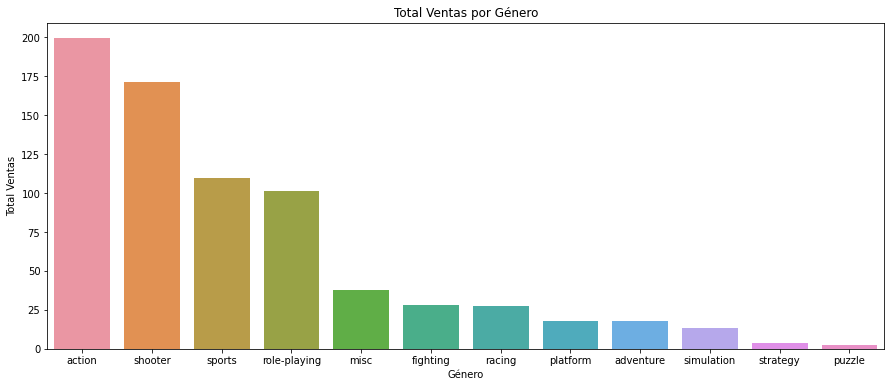

In [120]:
plt.figure(figsize=(15,6))
sns.barplot( data=games_genre, x="genre", y="total_sales")
plt.title('Total Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Total Ventas')

In [121]:
games.loc[original_df['genre']=='action'].groupby(['platform_company'])['total_sales'].agg(['sum','count'])

,sum,count
platform_company,,
Microsoft,43.39,116
Nintendo,33.24,128
Sony,117.39,336
Unknown-PC,5.34,39


In [122]:
games.loc[original_df['genre']=='action'].groupby(['platform'])['total_sales'].agg(['sum','count'])

,sum,count
platform,,
3ds,22.06,87
pc,5.34,39
ps3,18.10,77
ps4,91.62,142
psp,0.20,6
psv,7.47,111
wii,1.19,6
wiiu,9.99,35
x360,12.33,35


- Sony es la empresa que más dinero gana con el género de acción.
- Hay muchos juegos de acción para las consolas Sony y Nintendo.
- Hay muchos juegos de acción para las consolas PS4 y PS Vita en específico.
- Los juegos de acción, shooters y deportes son los que más dinero generan, mientras que los juegos de simulación, estrategia y rompecabezas son los que menos dinero generan.
- PS4, Xbox One y el Nintendo 3DS son las consolas más rentables para el género de acción.

# Conclusiones medias

- PS2 fue la consola más popular de todos los tiempos, pero dejó de producirse en 2011.
- PS4 es la plataforma más rentable y vende más juegos desde 2014.
- Las consolas más longevas son PS2, PSP y X360, que duraron 11 años antes de desaparecer.
- Sony es la empresa más rentable y vende más juegos.
- Microsoft es la segunda empresa con más ventas totales, con Xbox One como su producto estrella.
- Los juegos de acción son los que más dinero generan, seguidos de los shooters.
- Sony es la empresa que vende más juegos de diferentes plataformas.
- Los juegos que tienen mejores críticas suelen vender más.

# 4. Análisis por Regiones

- NA, Europa y Japón

- Comenzaré juntando las ventas de las 3 regiones en 'regions'

In [123]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    display(games.pivot_table(index='platform',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


- La consola más popular en Norteamérica es la PS4.
- La consola más popular en Europa es la PS4.
- La consola más popular en Japón es el Nintendo 3DS.

In [124]:
for region in regions:
    display(games.pivot_table(index='platform_company',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
platform_company,
Sony,123.18
Microsoft,109.57
Nintendo,44.08
Unknown-PC,7.23


,eu_sales
platform_company,
Sony,159.11
Microsoft,61.74
Nintendo,31.86
Unknown-PC,17.97


,jp_sales
platform_company,
Nintendo,51.55
Sony,41.14
Microsoft,0.40
Unknown-PC,0.00


- La compañía más popular en Norteamérica es Sony.
- La compañía más popular en Europa es Sony.
- La compañía más popular en Japón es Nintendo.

In [125]:
for region in regions:
    display(games.pivot_table(index='genre',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


- Los géneros más populares en Norteamérica son shooter y acción.
- El género más popular en Europa es la acción, seguido de shooter.
- El género más popular en Japón es el role-playing y luego el de acción.

In [126]:
for region in regions:
    display(games.pivot_table(index='rating',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


- El rating más popular en Norteamérica es M
- El rating más popular en Europa es M
- El rating más popular en Japón es T

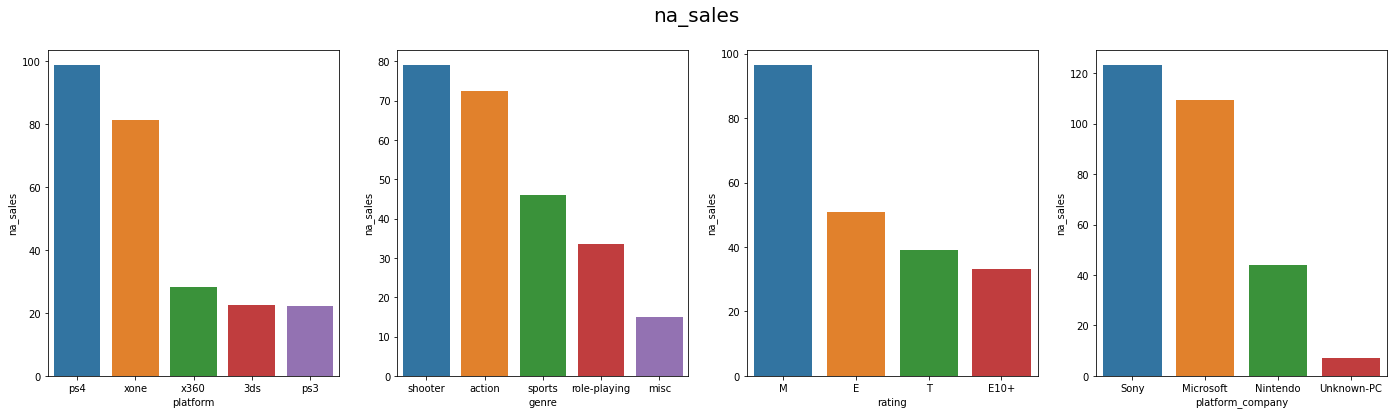

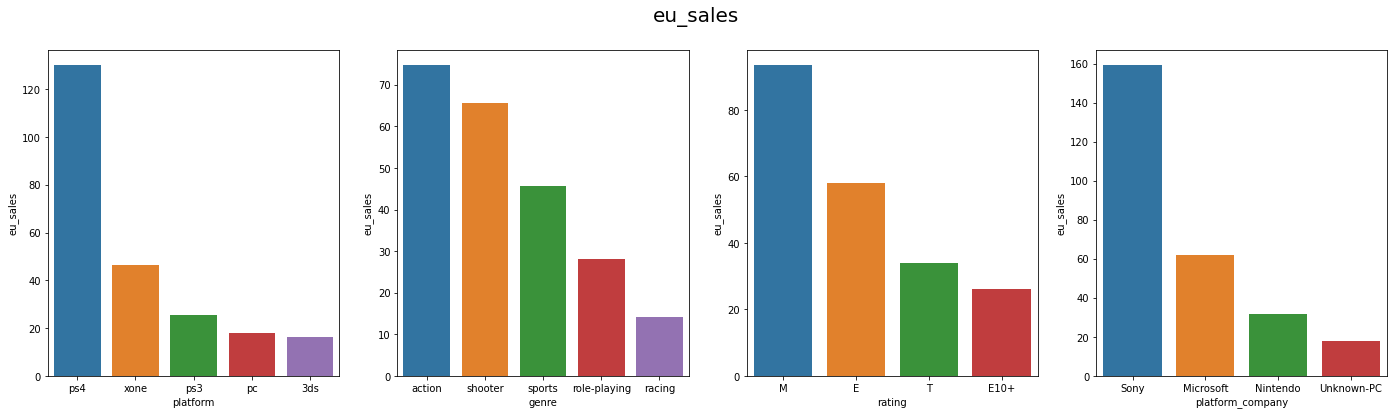

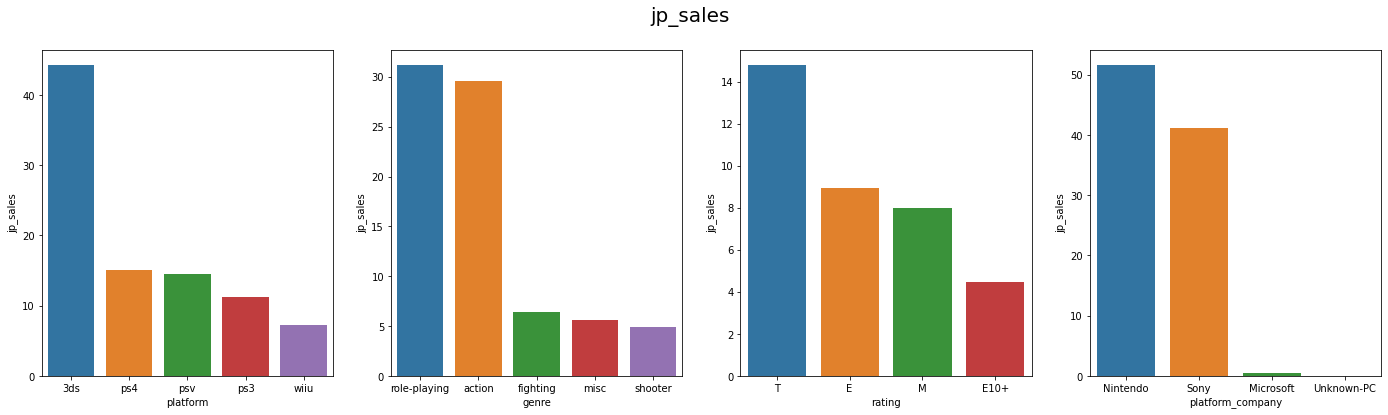

In [127]:
for region in regions:
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    for pivot, ax in zip(list(['platform','genre','rating', 'platform_company']),axes.flatten()[:4]):
        df_region = games.pivot_table(index=pivot, values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head()
        sns.barplot(data=df_region, x=pivot, y=region, ax=ax)
        fig.suptitle(region, fontsize=20)
    plt.show()

CONCLUSIONES
- La PS4 es la plataforma más popular en EE. UU. y Europa, mientras que la 3DS es la plataforma más popular en Japón.
- Japón tiene sus propios gustos únicos en cuanto a videojuegos, con el género de rol siendo el más popular.
- Nintendo es la empresa más popular en Japón, mientras que Sony es la empresa más popular en EE. UU. y Europa.
- EE. UU. y Europa tienen gustos más similares, con los juegos de acción y las clasificaciones M siendo los más populares.





- Es importante tener en cuenta las diferentes culturas y gustos de los jugadores a la hora de crear campañas publicitarias para videojuegos. También es importante tener en cuenta las clasificaciones ESRB, ya que pueden afectar a las ventas en las distintas regiones.

# 5. Prueba de Hipótesis

- Voy a probar la primera hipótesis de que las puntuaciones medias de los usuarios de las plataformas Xbox One y PC son las mismas.

- Necesito asegurarme de que las puntuaciones de ambas plataformas tengan una variabilidad similar. Para ello, voy a utilizar la prueba de Levene. Si la prueba nos da un valor p mayor que 0,05, entonces podré seguir adelante y ver si las puntuaciones son las mismas. Si el valor p es menor que 0,05, entonces no podré seguir adelante ni ver si las puntuaciones son las mismas.

In [153]:
alpha = .05

prueba_xone = games.loc[games['platform']=='xone']['user_score'].dropna()
prueba_pc = games.loc[games['platform']=='pc']['user_score'].dropna()

In [154]:
st.levene(prueba_xone, prueba_pc, center='mean')

LeveneResult(statistic=8.247858938786841, pvalue=0.004386298510089398)

- La prueba no encontró ninguna gran diferencia en la dispersión de los datos entre los dos grupos. Por lo tanto, puedo suponer que los dos grupos tienen la misma varianza.

In [157]:
results = st.ttest_ind(prueba_xone,prueba_pc, equal_var=True)

print('Prueba Xbox one media: ', prueba_xone.mean())
print('Prueba Pc media: ', prueba_pc.mean())
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No se puede rechazar la hipótesis nula")

Prueba Xbox one media:  6.594545454545456
Prueba Pc media:  6.298360655737705
p-value:  0.10450507919348415
No se puede rechazar la hipótesis nula


- En función de los resultados de una prueba estadística, podemos decir con un 95% de confianza que la calificación media de los usuarios de Xbox One es igual a la calificación media de los usuarios de PC.

- El p-value de la prueba es mayor que 0.05, lo que significa que no hay suficiente evidencia para rechazar la hipótesis nula, que es que las calificaciones medias son iguales. En otras palabras, las calificaciones medias de los usuarios de Xbox One y PC son estadísticamente indistinguibles.

# Hipótesis 2

- Quiero ver si las puntuaciones que los usuarios dan a los juegos de acción y deportes son diferentes. Para ello, voy a crear dos conjuntos de datos: uno con los datos de los juegos de acción y otro con los datos de los juegos de deportes.

In [158]:
alpha = 0.05

prueba_action = games.loc[games['genre']=='action']['user_score'].dropna()
prueba_sports = games.loc[games['genre']=='sports']['user_score'].dropna()

In [159]:
st.levene(prueba_action, prueba_sports, center='mean')

LeveneResult(statistic=25.153910151528862, pvalue=7.810758187558722e-07)

- La prueba mostró que los dos grupos tienen varianzas diferentes. Básicamente, la dispersión de los datos es diferente en los dos grupos.

In [161]:
results = st.ttest_ind(prueba_action,prueba_sports, equal_var=False)

print('Prueba Action Media: ', prueba_action.mean())
print('Prueba Sports Media: ', prueba_sports.mean())
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No se puede rechazar la hipótesis nula")

Prueba Action Media:  6.760606060606061
Prueba Sports Media:  5.2251968503937
p-value:  1.1825550382644557e-14
Rechazamos la hipótesis nula


- La prueba de Levene mostró que los dos grupos tienen la misma varianza, lo que significa que la dispersión de los datos es similar en los dos grupos.
- Con un 95% de confianza, puedo rechazar la hipótesis nula
- La calificación media de los usuarios de los juegos de acción no es la misma que la calificación media de los usuarios de los juegos deportivos. En otras palabras, los juegos de acción tienen una calificación media de los usuarios más alta que los juegos deportivos.

<div class="alert alert-info" role="alert">
    
<b>Comentario del estudiante</b> <a class="tocSkip"></a>
    
 - Gracias por las observaciones, ya he hecho las correciones requeridas.
</div>

# Conclusiones Finales

- El objetivo de este proyecto era identificar patrones que determinen si un juego tiene éxito o no. Esto me permitiría identificar posibles grandes ganadores y planificar campañas publicitarias.

- Comencé el proyecto analizando los datos disponibles. Me di cuenta de que había algunos datos faltantes, como el género de algunos juegos. Para completar estos datos, utilicé un algoritmo de aprendizaje automático. Después de completar los datos, pude realizar un análisis más completo.

- Identifiqué los géneros más exitosos en términos de ventas. Los géneros más exitosos fueron de acción, deportes y de aventura. También identifiqué las plataformas más exitosas, no solo en NA, sino en Europa y Japón.

- Luego, miré la relación entre las puntuaciones de la crítica y de los usuarios y las ventas totales. No encontré una relación muy fuerte entre estas variables. Esto significa que las puntuaciones de la crítica y de los usuarios no son un buen predictor de las ventas totales.

- Finalmente, creé perfiles de usuarios para los mercados norteamericano, europeo y japonés. Estos perfiles me permitieron ver cómo los usuarios de diferentes regiones valoran los videojuegos.

- Los patrones que determinan si un juego tiene éxito o no son la combinación de plataforma, género y clasificación en el mercado regional.

- En Japón, los juegos de rol populares para adolescentes con clasificación T son exitosos.
En América del Norte, los juegos de disparos y acción populares para adultos con clasificación M son exitosos.
En Europa, los juegos de acción populares para adultos con clasificación M son exitosos.
- Para la campaña publicitaria, es mejor enfocarse en desarrollar juegos que se encuentren en la mitad de su ciclo de vida (4 a 5 años), del popular género de acción, clasificación M y última consola/plataforma.

- Las pruebas de hipótesis que hice confirmaron mis suposiciones iniciales. No pude refutar la hipótesis de que las puntuaciones medias de los usuarios de Xbox One y PC son las mismas. Sin embargo, la hipótesis de que las puntuaciones medias de los usuarios de los géneros acción y deportes son diferentes se mantuvo.

- Utilicé únicamente los datos filtrados posteriores al 2014 para hacer el perfilamiento y las pruebas de hipótesis.